In [120]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_raw = "C:/Users/leala/Documents/Data Git Repo/python-challenge/Python_Challenge/Resources/city_data.csv"
ride_data_raw = "C:/Users/leala/Documents/Data Git Repo/python-challenge/Python_Challenge/Resources/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_raw)
ride_data = pd.read_csv(ride_data_raw)

# Clean Up the column headers
city_clean = city_data.rename(columns={"city":"City", "driver_count":"Driver Count", "type":"Type"})
ride_clean = ride_data.rename(columns={"city":"City", "date":"Date", "fare":"Fare", "ride_id":"Ride ID"})

# Combine the data into a single dataset
complete_data = pd.merge(city_clean, ride_clean, how="left", on=["City", "City"])

# Display the data table for preview
complete_data.head(3)

# scatter_plot = complete_data.loc[:, ["City", "Type", "Fare", "Driver Count"]]
# scatter_plot.groupby("Type").sum()

,City,Driver Count,Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416


## Bubble Plot of Ride Sharing Data

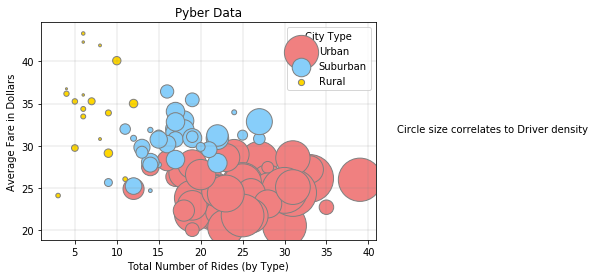

In [121]:
# Create x coordinates for each
urban = complete_data.loc[complete_data["Type"] == "Urban"]
suburban = complete_data.loc[complete_data["Type"] == "Suburban"]
rural = complete_data.loc[complete_data["Type"] == "Rural"]

# Calculate avg fare per type, total drivers/city
urban_avg_fare = urban.groupby("City")["Fare"].mean()
suburban_avg_fare = suburban.groupby("City")["Fare"].mean()
rural_avg_fare = rural.groupby("City")["Fare"].mean()

# Calcualte the total rides by type
urban_ride_total = urban.groupby("City")["Ride ID"].count()
suburban_ride_total = suburban.groupby("City")["Ride ID"].count()
rural_ride_total = rural.groupby("City")["Ride ID"].count()

# Cacluate total drivers by type
urban_drivers = urban.groupby("City")["Driver Count"].sum()
suburban_drivers = suburban.groupby("City")["Driver Count"].sum()
rural_drivers = rural.groupby("City")["Driver Count"].sum()

# Build the scatter plots for each city types
urban_scatter = plt.scatter(urban_ride_total, urban_avg_fare, urban_drivers, marker="o", alpha=1, 
                            facecolors="lightcoral", edgecolors="grey", label="Urban")
suburban_scatter = plt.scatter(suburban_ride_total, suburban_avg_fare, suburban_drivers, marker="o", 
                            facecolors="lightskyblue", edgecolors="grey", label="Suburban")
rural_scatter = plt.scatter(rural_ride_total, rural_avg_fare, rural_drivers, marker="o", 
                            facecolors="gold", edgecolors="grey", label="Suburban")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (by Type)")
plt.ylabel("Average Fare in Dollars")

# Create a legend and text label
plt.legend(["Urban", "Suburban", "Rural"], loc='best', title="City Type")
plt.title("Pyber Data")
plt.figtext(.95, .5, "Circle size correlates to Driver density")
plt.grid(color='grey', linewidth=.2)

# Save Figure
plt.savefig("Pyber_Scatter_Plot.png", edgecolor='black')

# Now Show it
plt.show()

## Total Fares by City Type

In [122]:
# Create the datasets for Fares
fares = complete_data.loc[:, ["Type", "Fare"]]

# creating lables, values for the chart that I'll use again later
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (.03, .03, .15)

# Save Figure
plt.savefig("Pyber_Fares.png", edgecolor='black')

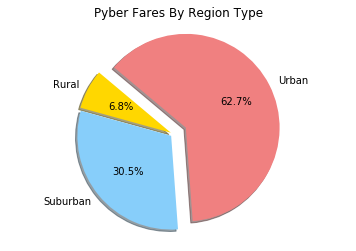

In [123]:
# Create the chart and label it
plt.pie(fares.groupby("Type")["Fare"].sum(), explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Pyber Fares By Region Type')
plt.axis('equal')

plt.show()

## Total Rides by City Type

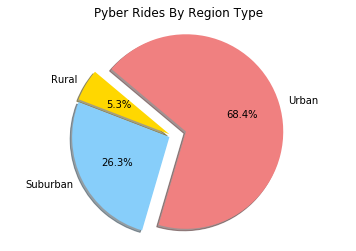

In [124]:
# Calculate Ride Percents
tot_riders = complete_data.loc[:, ["Type", "Ride ID"]]

# Create the pie chart, reuse labels and colors
plt.pie(tot_riders.groupby("Type")["Ride ID"].count(), explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('Pyber Rides By Region Type')
plt.axis('equal')

plt.show()

# Save Figure
plt.savefig("Pyber_Rides.png", edgecolor='black')

## Total Drivers by City Type

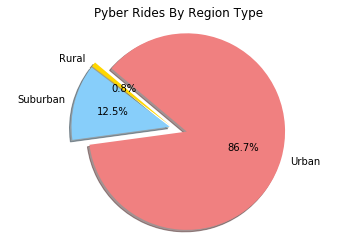

In [125]:
# Calculate Driver Percents
drivers = complete_data.loc[:, ["Type", "Driver Count"]]
driver_count = drivers.groupby("Type")["Driver Count"].sum() / len(drivers.groupby("Type")["Driver Count"])

# find total unqiue drivers


# Build Pie Charts
plt.pie(driver_count, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('Pyber Rides By Region Type')
plt.axis('equal')

plt.show()

# Save Figure
plt.savefig("Pyber_Drivers.png", edgecolor='black')

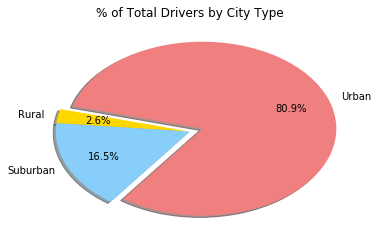

In [6]:
# Show Figure
plt.show()